---

#  mplfinance Date iLoc Transform

---

In [1]:
# This allows multiple outputs from a single jupyter notebook cell:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
%matplotlib inline
import pandas as pd

In [3]:
import mplfinance as mpf
mpf.__version__

'0.12.7a12'

In [4]:
df = pd.read_csv('../data/SP500_NOV2019_Hist.csv',index_col=0,parse_dates=True)

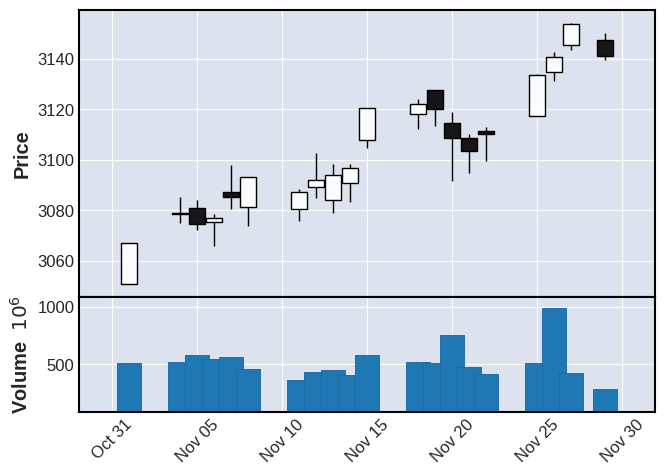

In [5]:
mpf.plot(df,type='candle',show_nontrading=True,volume=True)

### Uses for DateIlocTransform

#### All uses are for `show_nontrading=False` only:

- `.to_date()` &nbsp; location *to* date: &nbsp; for tick label formatting.
- `.to_iloc()` &nbsp; date *to* location: &nbsp; for `xticks` placement.
- `.to_iloc()` &nbsp; date *to* location: &nbsp; for `xlim` placement.
- `.to_iloc()` &nbsp; date *to* location: &nbsp; for `lines` placement.

---

- It seems to me that  
  - **interpolation** may be better using the actual datetime series (rather than the linear formula), whereas 
  - **extrapolation** *will require* the linear formula.
    - Or for "known" cases may be able to use **date calculations**, for example:
      - quartile(0.65) == quartile(0.50) == quartile(0.35) == "known" frequency.
      - intraday with consistent trading hours in data
      - daily with weekends missing (maybe someday allow users to supply holidays)
      - weekly, monthly, yearly, etc. are simple?
  - need to run some tests to see which, if either, is better.
- Keep in mind, while testing, that `xlim` values will affect `xticks` placement.


---

### Experiments

- extrapolation: least squares versus end-to-end linear
  - intraday 1m, 15m, 1h, 3h
  - daily M-F
  - weekly
  
- extrapolation: known frequency formula
  - intraday 1m, 15m, 1h, 3h
  - daily M-F
  - weekly



In [6]:
%ls -l ../data/*.csv

-rw-r--r-- 1 dino dino  33851 Dec 28 18:30 ../data/SP500_20191106_IDayBollinger.csv
-rw-r--r-- 1 dino dino   1097 Sep 22  2020 ../data/SP500_NOV2019_Hist.csv
-rw-r--r-- 1 dino dino  78853 Sep 22  2020 ../data/SP500_NOV2019_IDay.csv
-rw-r--r-- 1 dino dino  92731 Feb 22 12:34 ../data/SP500_NOV2019_IDayRVol.csv
-rw-r--r-- 1 dino dino  35001 Sep 22  2020 ../data/SPY_20110701_20120630_Bollinger.csv
-rwxr-xr-x 1 dino dino  33235 Apr  6 18:26 ../data/jpyusd_barchartdotcom.csv*
-rw-r--r-- 1 dino dino 239788 Sep 22  2020 ../data/yahoofinance-AAPL-20040819-20180120.csv
-rw-r--r-- 1 dino dino 250345 Sep 22  2020 ../data/yahoofinance-GOOG-20040819-20180120.csv
-rw-r--r-- 1 dino dino 161639 Sep 22  2020 ../data/yahoofinance-INTC-19950101-20040412.csv
-rw-r--r-- 1 dino dino 189400 Sep 22  2020 ../data/yahoofinance-SPY-20080101-20180101.csv
-rw-r--r-- 1 dino dino   6953 Mar 22 10:49 ../data/yahoofinance-SPY-20200901-20210113.csv


In [7]:
INPUT = ['../data/SP500_NOV2019_Hist.csv',
         '../data/SP500_NOV2019_IDayRVol.csv',
         '../data/SPY_20110701_20120630_Bollinger.csv',
         '../data/yahoofinance-GOOG-20040819-20180120.csv',
        ]

In [8]:
for file in INPUT:
    data = pd.read_csv(file,index_col=0,parse_dates=True)
    data.iloc[[0,1,-1],:].style.set_caption(str(data.shape)+' '+file)
    dts  = data.index.to_series()
    diff = dts.shift(-1) - dts
    for jj in range(9,0,-1):
        q = round(0.1*jj,1)
        print('diff.quantile('+str(q)+')=',diff.quantile(q))

,Open,High,Low,Close,Volume
Date,,,,,
2019-11-01 00:00:00,3050.720000,3066.950000,3050.720000,3066.910000,510301237
2019-11-04 00:00:00,3078.960000,3085.200000,3074.870000,3078.270000,524848878
2019-11-29 00:00:00,3147.180000,3150.300000,3139.340000,3140.980000,286602291


diff.quantile(0.9)= 3 days 00:00:00
diff.quantile(0.8)= 2 days 09:36:00
diff.quantile(0.7)= 1 days 00:00:00
diff.quantile(0.6)= 1 days 00:00:00
diff.quantile(0.5)= 1 days 00:00:00
diff.quantile(0.4)= 1 days 00:00:00
diff.quantile(0.3)= 1 days 00:00:00
diff.quantile(0.2)= 1 days 00:00:00
diff.quantile(0.1)= 1 days 00:00:00


,Open,Close,High,Low,Volume
Date,,,,,
2019-11-05 09:30:00,3080.800000,3080.490000,3081.470000,3080.300000,2209795
2019-11-05 09:31:00,3080.330000,3079.360000,3080.330000,3079.150000,1739410
2019-11-08 15:59:00,3091.160000,3092.910000,3092.910000,3090.960000,1023516


diff.quantile(0.9)= 0 days 00:01:00
diff.quantile(0.8)= 0 days 00:01:00
diff.quantile(0.7)= 0 days 00:01:00
diff.quantile(0.6)= 0 days 00:01:00
diff.quantile(0.5)= 0 days 00:01:00
diff.quantile(0.4)= 0 days 00:01:00
diff.quantile(0.3)= 0 days 00:01:00
diff.quantile(0.2)= 0 days 00:01:00
diff.quantile(0.1)= 0 days 00:01:00


,Open,High,Low,Close,Adj Close,Volume,UpperB,LowerB,PercentB
Date,,,,,,,,,
2011-07-01 00:00:00,132.089996,134.100006,131.779999,133.919998,117.161659,202385700,132.373927,125.316073,1.219057
2011-07-05 00:00:00,133.779999,134.080002,133.389999,133.809998,117.065437,165936000,133.254297,124.912703,1.066618
2012-06-29 00:00:00,135.199997,136.270004,134.850006,136.100006,121.598610,212250900,136.721010,128.792993,0.921670


diff.quantile(0.9)= 3 days 00:00:00
diff.quantile(0.8)= 3 days 00:00:00
diff.quantile(0.7)= 1 days 00:00:00
diff.quantile(0.6)= 1 days 00:00:00
diff.quantile(0.5)= 1 days 00:00:00
diff.quantile(0.4)= 1 days 00:00:00
diff.quantile(0.3)= 1 days 00:00:00
diff.quantile(0.2)= 1 days 00:00:00
diff.quantile(0.1)= 1 days 00:00:00


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-08-19 00:00:00,49.676899,51.693783,47.669952,49.845802,49.845802,44994500
2004-08-20 00:00:00,50.178635,54.187561,49.925285,53.805050,53.805050,23005800
2018-01-19 00:00:00,1131.829956,1137.859985,1128.300049,1137.510010,1137.510010,1387700


diff.quantile(0.9)= 3 days 00:00:00
diff.quantile(0.8)= 3 days 00:00:00
diff.quantile(0.7)= 1 days 00:00:00
diff.quantile(0.6)= 1 days 00:00:00
diff.quantile(0.5)= 1 days 00:00:00
diff.quantile(0.4)= 1 days 00:00:00
diff.quantile(0.3)= 1 days 00:00:00
diff.quantile(0.2)= 1 days 00:00:00
diff.quantile(0.1)= 1 days 00:00:00


### Here we are going to develop a transform similar to date_to_iloc() with the following features:
- Able to transform both directions
- saves the relavant input data to avoid *some* recalculation
- implementation as a class will enable saving the input data in the transform object.

In [9]:
df = pd.read_csv('../data/SP500_NOV2019_IDayRVol.csv',index_col=0,parse_dates=True)
dtindex = df.index

In [10]:
dtseries = dtindex.to_series()
dtseries['2019-11-08 15:50:01':]

Date
2019-11-08 15:51:00   2019-11-08 15:51:00
2019-11-08 15:52:00   2019-11-08 15:52:00
2019-11-08 15:53:00   2019-11-08 15:53:00
2019-11-08 15:54:00   2019-11-08 15:54:00
2019-11-08 15:55:00   2019-11-08 15:55:00
2019-11-08 15:56:00   2019-11-08 15:56:00
2019-11-08 15:57:00   2019-11-08 15:57:00
2019-11-08 15:58:00   2019-11-08 15:58:00
2019-11-08 15:59:00   2019-11-08 15:59:00
Name: Date, dtype: datetime64[ns]

In [11]:
dtseries.describe(datetime_is_numeric=True)

count                             1563
mean     2019-11-07 00:43:29.596929024
min                2019-11-05 09:30:00
25%                2019-11-06 00:45:00
50%                2019-11-06 16:00:00
75%                2019-11-07 15:59:30
max                2019-11-08 15:59:00
Name: Date, dtype: object

In [12]:
diff = dtseries.shift(-1) - dtseries

In [13]:
diff.describe()

count                         1562
mean     0 days 00:03:00.883482714
std      0 days 00:45:56.566393842
min                0 days 00:01:00
25%                0 days 00:01:00
50%                0 days 00:01:00
75%                0 days 00:01:00
max                0 days 17:30:00
Name: Date, dtype: object

In [14]:
diff.quantile(0.9981)

Timedelta('0 days 00:36:46.254000005')

---
### Here we experiment with finding gaps in the data, specifically for the example of *intraday* data with specific trading hours.

In [15]:
# %load ../../tmp.py
from datetime import datetime, timedelta
import pandas as pd

# Construct dummy dataframe
dates = pd.to_datetime([
    '2016-08-03',
    '2016-08-04',
    '2016-08-05',
    '2016-08-17',
    '2016-09-05',
    '2016-09-06',
    '2016-09-07',
    '2016-09-19'])
df = pd.DataFrame(dates, columns=['date'])
df


,date
0,2016-08-03
1,2016-08-04
2,2016-08-05
3,2016-08-17
4,2016-09-05
5,2016-09-06
6,2016-09-07
7,2016-09-19


In [16]:
# Take the diff of the first column (drop 1st row since it's undefined)
deltas = df['date'].diff()[1:]
deltas
# Filter diffs (here days > 1, but could be seconds, hours, etc)
gaps = deltas[deltas > timedelta(days=1)]
gaps
# Print results
#print(f'{len(gaps)} gaps with average gap duration: {gaps.mean()}')
#for i, g in gaps.iteritems():
#    gap_start = df['date'][i - 1]
#    print(f'Start: {datetime.strftime(gap_start, "%Y-%m-%d")} | '
#          f'Duration: {str(g.to_pytimedelta())}')

1    1 days
2    1 days
3   12 days
4   19 days
5    1 days
6    1 days
7   12 days
Name: date, dtype: timedelta64[ns]

3   12 days
4   19 days
7   12 days
Name: date, dtype: timedelta64[ns]

In [17]:
idf = pd.read_csv('../data/SP500_NOV2019_IDayRVol.csv',index_col=0,parse_dates=True)

In [18]:
idf.iloc[[0,1,2,-2,-1]]

,Open,Close,High,Low,Volume
Date,,,,,
2019-11-05 09:30:00,3080.80,3080.49,3081.47,3080.30,2209795
2019-11-05 09:31:00,3080.33,3079.36,3080.33,3079.15,1739410
2019-11-05 09:32:00,3079.43,3079.68,3080.46,3079.43,896995
2019-11-08 15:58:00,3090.73,3091.04,3091.13,3090.58,1231718
2019-11-08 15:59:00,3091.16,3092.91,3092.91,3090.96,1023516


In [19]:
deltas = idf.index.to_series().diff()[1:]
deltas
# Filter diffs (here days > 1, but could be seconds, hours, etc)
deltas.value_counts()
freq = deltas.value_counts().idxmax()
freq
gaps = deltas[deltas != freq]
gaps

Date
2019-11-05 09:31:00   0 days 00:01:00
2019-11-05 09:32:00   0 days 00:01:00
2019-11-05 09:33:00   0 days 00:01:00
2019-11-05 09:34:00   0 days 00:01:00
2019-11-05 09:35:00   0 days 00:01:00
                            ...      
2019-11-08 15:55:00   0 days 00:01:00
2019-11-08 15:56:00   0 days 00:01:00
2019-11-08 15:57:00   0 days 00:01:00
2019-11-08 15:58:00   0 days 00:01:00
2019-11-08 15:59:00   0 days 00:01:00
Name: Date, Length: 1562, dtype: timedelta64[ns]

0 days 00:01:00    1559
0 days 17:30:00       3
Name: Date, dtype: int64

Timedelta('0 days 00:01:00')

Date
2019-11-06 09:30:00   0 days 17:30:00
2019-11-07 09:30:00   0 days 17:30:00
2019-11-08 09:30:00   0 days 17:30:00
Name: Date, dtype: timedelta64[ns]

In [20]:
idf.head(3)
idf.loc['2019-11-06'].index[-1]
idf.loc['2019-11-07'].index[ 0]
idf.loc['2019-11-07'].index[ 0] - idf.loc['2019-11-06'].index[-1]

,Open,Close,High,Low,Volume
Date,,,,,
2019-11-05 09:30:00,3080.80,3080.49,3081.47,3080.30,2209795
2019-11-05 09:31:00,3080.33,3079.36,3080.33,3079.15,1739410
2019-11-05 09:32:00,3079.43,3079.68,3080.46,3079.43,896995


Timestamp('2019-11-06 16:00:00')

Timestamp('2019-11-07 09:30:00')

Timedelta('0 days 17:30:00')

### The datetime index associate with the gap (i.e. with the gap duration)<br> appears to be the ***end time*** of the gap (or rather the start time of the next *non-gap*)

In [21]:
gaps

Date
2019-11-06 09:30:00   0 days 17:30:00
2019-11-07 09:30:00   0 days 17:30:00
2019-11-08 09:30:00   0 days 17:30:00
Name: Date, dtype: timedelta64[ns]

In [22]:
import pandas as pd
import numpy  as np
import matplotlib.dates as mdates
from mplfinance._utils import _date_to_mdate
    
class DateIlocTransform:
    '''Create a transform object that can transform from a date to a DatetimeIndex location, and vis versa.
    Requires a Pandas DatetimeIndex upon creation
    If `date` does not exactly match a date in the series then interpolate between two dates.
    If `date` is outside the range of dates in the series, then extrapolate.
    '''
    
    def __init__(self,dtindex):
        if not isinstance(dtindex,pd.DatetimeIndex):
            raise TypeError('Need `pandas.DatetimeIndex`, but got "'+str(type(dtindex))+'"')
        if not len(dtindex) > 1:
            raise ValueError('`dtindex` must have length of at least 2.')
        ixlist = np.linspace(0,len(dtindex),len(dtindex)+1)[0:-1]
        self._to_iloc_series = pd.Series(ixlist,index=dtindex)
        self._to_date_series = pd.Series(dtindex.values,index=ixlist)
        dtseries = dtindex.to_series()
        self._lsslope, self._lsyicpt = self._lsq_linear(dtseries)
        self._epslope, self._epyicpt = self._ep_linear(dtseries)
        

    def _lsq_linear(self,dtseries):
        '''
        Calculate `y = mx + b` linear relationship between `date` and
        `iloc` in `dtseries`.  Return slope (m) and y_intercept (b).
        This closed-form linear least squares algorithm was taken from
        https://mmas.github.io/least-squares-fitting-numpy-scipy
        '''
        si = dtseries
        s  = si.dropna() 
        if len(s) < 2:
            err = 'NOT enough data for Least Squares'
            if (len(si) > 2):
                err += ', due to presence of NaNs'
            raise ValueError(err)
        xs = mdates.date2num(s.index.to_pydatetime())
        ys = [y for y in range(len(xs))]
        a  = np.vstack([xs, np.ones(len(xs))]).T
        m, b  = np.dot(np.linalg.inv(np.dot(a.T,a)), np.dot(a.T,ys))
        #x1, x2 = xs[0], xs[-1]
        #y1 = m*x1 + b
        #y2 = m*x2 + b
        #x1, x2 = mdates.num2date(x1), mdates.num2date(x2)
        #return ((x1,y1),(x2,y2))
        return m, b
    
    def _ep_linear(self,dtseries):
        d1 = _date_to_mdate(dtseries.index[0])
        d2 = _date_to_mdate(dtseries.index[-1])

        i1 = 0.0
        i2 = len(dtseries) - 1.0

        slope   = (i2 - i1) / (d2 - d1)
        yitrcpt1 = i1 - (slope*d1)
        yitrcpt2 = i2 - (slope*d2)
        if yitrcpt1 != yitrcpt2:
            print('WARNING: yintercepts NOT equal!!!(',yitrcpt1,yitrcpt2,')')
            yitrcpt = (yitrcpt1 + yitrcpt2) / 2.0
        else:
            yitrcpt = yitrcpt1 
        return slope, yitrcpt
    
    def to_iloc(self,date,method='ls'):
        if method == 'ls':   # Least Squares linear
            return self._lsslope*mdates.date2num(date) + self._lsyicpt
        elif method == 'ep': # End Point linear
            return self._epslope*mdates.date2num(date) + self._epyicpt
        elif method == 'in': # INterpolate
            #self._to_iloc_series = pd.Series(range(len(dtindex)),index=dtindex)
            i1s = self._to_iloc_series.loc[:date]
            i1  = i1s[-1] if len(i1s) > 0 else float('nan') # else need to extrapolate
            i2s = self._to_iloc_series.loc[date:]
            i2  = i2s[ 0] if len(i2s) > 0 else float('nan') # else need to extrapolate
            #print('\ndate,i1,i2=',date,i1,i2)
            loc1 = i1
            loc2 = i2
            d1 = self._to_date_series.iloc[int(round(i1,0))]
            d2 = self._to_date_series.iloc[int(round(i2,0))]
            #print('date,i1,i2,d1,d2=',date,i1,i2,d1,d2)
            loc = ((date-d1)/(d2-d1))*(loc2-loc1) + loc1 if d1 != d2 else loc1
            #print('loc1,loc2,loc=',loc1,loc2,loc)
            return loc
        else:
            raise ValueError('Bad value for `method`: ('+str(method)+') ')
        return loc2
    
    def to_datetime(self,iloc,method='ls'):
        '''
        y = mx + b    
        x = (y-b)/m
        '''
        if method == 'ls':    # Least Squares linear
            d = (iloc - self._lsyicpt)/self._lsslope
            return mdates.num2date(d).replace(tzinfo=None)
        elif method == 'ep':  # End Point linear
            d = (iloc - self._epyicpt)/self._epslope
            return mdates.num2date(d).replace(tzinfo=None)
        elif method == 'in': # INterpolate
            #self._to_date_series = pd.Series(dtindex.values,index=range(len(dtindex))) 
            d1s = self._to_date_series.loc[:iloc]
            d1  = d1s.iloc[-1] if len(d1s) > 0 else float('nan') # else should extrapolate
            d2s = self._to_date_series.loc[iloc:]
            d2  = d2s.iloc[ 0] if len(d2s) > 0 else float('nan') # else should extrapolate
            if d1 == d2:
                return d1
            loc1 = int(round(self._to_iloc_series.loc[d1],0))
            loc2 = int(round(self._to_iloc_series.loc[d2],0))
            #print('\nd1,d2=',d1.date().day,d2.date().day,
            #      ' iloc,loc1,loc2=',iloc,loc1,loc2)
            #print('\nd1,d2,(d2-d1),type(d2-d1)=',d1,d2,d2-d1,type(d2-d1))
            # d1,d2= 8 11  iloc,loc1,loc2= 5.333333333333333 5 6
            # d1,d2,(d2-d1)= 2019-11-08 00:00:00 2019-11-11 00:00:00 3 days 00:00:00
            # Timestamp('2019-11-08 23:59:59.999999999')
            # d = ((iloc-loc1)/(loc2-loc1))*(d2-d1) + d1
            d = ((iloc-loc1)*(d2-d1)) + d1
            return d.round('s')
        else:
            raise ValueError('Bad value for `method`: ('+str(method)+') ')

In [23]:
df = pd.read_csv('../data/SP500_NOV2019_Hist.csv',index_col=0,parse_dates=True)

In [24]:
dit = DateIlocTransform(df.index)

In [25]:
dtindex = df.index
ixlist = np.linspace(0,len(dtindex),len(dtindex)+1)[0:-1]
to_iloc_series = pd.Series(ixlist,index=dtindex)
to_date_series = pd.Series(dtindex.values,index=ixlist)

In [26]:
for method in ['ep','ls']:
    print('\n=== method: "'+method+'"  =====')
    for d in df.index.to_pydatetime():
        il = dit.to_iloc(d,method=method)
        dt = dit.to_datetime(il,method=method)
        err = 'ERR' if d.date().day != dt.date().day else ''
        print("%6.2f  %2d  %2d  %3s" % (il,d.date().day,dt.date().day,err))


=== method: "ep"  =====
  0.00   1   1     
  2.04   4   4     
  2.71   5   5     
  3.39   6   6     
  4.07   7   7     
  4.75   8   8     
  6.79  11  11     
  7.46  12  12     
  8.14  13  13     
  8.82  14  14     
  9.50  15  15     
 11.54  18  18     
 12.21  19  19     
 12.89  20  20     
 13.57  21  21     
 14.25  22  22     
 16.29  25  25     
 16.96  26  26     
 17.64  27  27     
 19.00  29  29     

=== method: "ls"  =====
 -0.46   1   1     
  1.65   4   4     
  2.36   5   5     
  3.06   6   6     
  3.77   7   7     
  4.47   8   8     
  6.58  11  11     
  7.28  12  12     
  7.99  13  13     
  8.69  14  14     
  9.39  15  15     
 11.51  18  18     
 12.21  19  19     
 12.91  20  20     
 13.62  21  21     
 14.32  22  22     
 16.43  25  25     
 17.13  26  26     
 17.84  27  27     
 19.25  29  29     


In [27]:
df.index[0:8]

DatetimeIndex(['2019-11-01', '2019-11-04', '2019-11-05', '2019-11-06',
               '2019-11-07', '2019-11-08', '2019-11-11', '2019-11-12'],
              dtype='datetime64[ns]', name='Date', freq=None)

In [28]:
daterange = pd.date_range(start=df.index[0],end=df.index[-1],freq='D')
#for d in df.index.to_pydatetime():
print('len(daterange)=',len(daterange))
for d in daterange:
    il = dit.to_iloc(d,method='in')
    #print('il=',il,type(il))
    dt = dit.to_datetime(il,method='in')
    err = 'ERR' if d.date().day != dt.date().day else ''
    print("%6.2f  %s  %2d  %2d  %3s" % (il,d.date(),d.date().day,dt.date().day,err))

len(daterange)= 29
  0.00  2019-11-01   1   1     
  0.33  2019-11-02   2   2     
  0.67  2019-11-03   3   3     
  1.00  2019-11-04   4   4     
  2.00  2019-11-05   5   5     
  3.00  2019-11-06   6   6     
  4.00  2019-11-07   7   7     
  5.00  2019-11-08   8   8     
  5.33  2019-11-09   9   9     
  5.67  2019-11-10  10  10     
  6.00  2019-11-11  11  11     
  7.00  2019-11-12  12  12     
  8.00  2019-11-13  13  13     
  9.00  2019-11-14  14  14     
 10.00  2019-11-15  15  15     
 10.33  2019-11-16  16  16     
 10.67  2019-11-17  17  17     
 11.00  2019-11-18  18  18     
 12.00  2019-11-19  19  19     
 13.00  2019-11-20  20  20     
 14.00  2019-11-21  21  21     
 15.00  2019-11-22  22  22     
 15.33  2019-11-23  23  23     
 15.67  2019-11-24  24  24     
 16.00  2019-11-25  25  25     
 17.00  2019-11-26  26  26     
 18.00  2019-11-27  27  27     
 18.50  2019-11-28  28  28     
 19.00  2019-11-29  29  29     


In [29]:
td = 0.333333333333333*pd.Timedelta(days=3)
td
td.round('s')

Timedelta('0 days 23:59:59.999999999')

Timedelta('1 days 00:00:00')

In [38]:
df.index[0]
df.index[-1] - df.index[0]
(df.index[-1] - df.index[0]).days
len(df)

Timestamp('2019-11-01 00:00:00')

Timedelta('28 days 00:00:00')

28

20

In [41]:
(len(df))/(df.index[-1] - df.index[0]).days
(len(df)-1)/(df.index[-1] - df.index[0]).days
5/7

0.7142857142857143

0.6785714285714286

0.7142857142857143

In [35]:
df.index[19]
df.index[-1]

Timestamp('2019-11-29 00:00:00')

Timestamp('2019-11-29 00:00:00')

In [44]:
ls -l ../data

total 1192
-rw-r--r-- 1 dino dino  33851 Dec 28 18:30 SP500_20191106_IDayBollinger.csv
-rw-r--r-- 1 dino dino   1097 Sep 22  2020 SP500_NOV2019_Hist.csv
-rw-r--r-- 1 dino dino  78853 Sep 22  2020 SP500_NOV2019_IDay.csv
-rw-r--r-- 1 dino dino  92731 Feb 22 12:34 SP500_NOV2019_IDayRVol.csv
-rw-r--r-- 1 dino dino  35001 Sep 22  2020 SPY_20110701_20120630_Bollinger.csv
-rwxr-xr-x 1 dino dino  33235 Apr  6 18:26 jpyusd_barchartdotcom.csv*
-rw-r--r-- 1 dino dino  66004 Sep 22  2020 sample_subplot.png
-rw-r--r-- 1 dino dino 239788 Sep 22  2020 yahoofinance-AAPL-20040819-20180120.csv
-rw-r--r-- 1 dino dino 250345 Sep 22  2020 yahoofinance-GOOG-20040819-20180120.csv
-rw-r--r-- 1 dino dino 161639 Sep 22  2020 yahoofinance-INTC-19950101-20040412.csv
-rw-r--r-- 1 dino dino 189400 Sep 22  2020 yahoofinance-SPY-20080101-20180101.csv
-rw-r--r-- 1 dino dino   6953 Mar 22 10:49 yahoofinance-SPY-20200901-20210113.csv


In [51]:
# print('\n==== INTC ====')
# df = pd.read_csv('../data/yahoofinance-INTC-19950101-20040412.csv',index_col=0,parse_dates=True)
# df.iloc[[0,1,-2,-1]]
# len(df)
# print('\n==== GOOG ====')
df = pd.read_csv('../data/yahoofinance-GOOG-20040819-20180120.csv',index_col=0,parse_dates=True)
df.iloc[[0,1,-2,-1]]
len(df)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-08-19,49.676899,51.693783,47.669952,49.845802,49.845802,44994500
2004-08-20,50.178635,54.187561,49.925285,53.805050,53.805050,23005800
2018-01-18,1131.410034,1132.510010,1117.500000,1129.790039,1129.790039,1198200
2018-01-19,1131.829956,1137.859985,1128.300049,1137.510010,1137.510010,1387700


3379

In [55]:
(df.index[-1] - df.index[0]).days
(len(df))/(df.index[-1] - df.index[0]).days
(len(df)-1)/(df.index[-1] - df.index[0]).days
5/7

4901

0.6894511324219547

0.6892470924301163

0.7142857142857143

In [109]:
(df.index[-1] - df.index[0]).days
yrs = ((df.index[-1] - df.index[0]).days - 1) / 365.25
hldys = yrs*3
((5/7)*365.25 - hldys)/365.25
print()
4/7
6/7

4901

0.6040970583764963

0.5714285714285714

0.8571428571428571

In [102]:
(len(df)-1)/(df.index[-1]-df.index[0]).days

0.6892470924301163

In [122]:
diff = df.index.to_series().diff(1)
dne1 = diff[ diff > pd.Timedelta(days=1) ]
len(diff)
len(dne1)
vc = dne1.value_counts()
vc[0]/vc[1] > 2
vc.idxmax().days

3379

729

True

3

In [142]:
dr = pd.date_range(start='1/1/2001',periods=30,freq='D')
dr

DatetimeIndex(['2001-01-01', '2001-01-02', '2001-01-03', '2001-01-04',
               '2001-01-05', '2001-01-06', '2001-01-07', '2001-01-08',
               '2001-01-09', '2001-01-10', '2001-01-11', '2001-01-12',
               '2001-01-13', '2001-01-14', '2001-01-15', '2001-01-16',
               '2001-01-17', '2001-01-18', '2001-01-19', '2001-01-20',
               '2001-01-21', '2001-01-22', '2001-01-23', '2001-01-24',
               '2001-01-25', '2001-01-26', '2001-01-27', '2001-01-28',
               '2001-01-29', '2001-01-30'],
              dtype='datetime64[ns]', freq='D')

In [138]:
(len(dr)-1)/(dr[-1] - dr[0]).days

1.0

In [147]:
dr = pd.date_range(start='1/1/2001',periods=30,freq='B')
dr

bday_Israel = pd.offsets.CustomBusinessDay(weekmask='Sun Mon Tue Wed Thu')
drI = pd.date_range(start='1/1/2001',periods=30,freq=bday_Israel)
drI

DatetimeIndex(['2001-01-01', '2001-01-02', '2001-01-03', '2001-01-04',
               '2001-01-05', '2001-01-08', '2001-01-09', '2001-01-10',
               '2001-01-11', '2001-01-12', '2001-01-15', '2001-01-16',
               '2001-01-17', '2001-01-18', '2001-01-19', '2001-01-22',
               '2001-01-23', '2001-01-24', '2001-01-25', '2001-01-26',
               '2001-01-29', '2001-01-30', '2001-01-31', '2001-02-01',
               '2001-02-02', '2001-02-05', '2001-02-06', '2001-02-07',
               '2001-02-08', '2001-02-09'],
              dtype='datetime64[ns]', freq='B')

DatetimeIndex(['2001-01-01', '2001-01-02', '2001-01-03', '2001-01-04',
               '2001-01-07', '2001-01-08', '2001-01-09', '2001-01-10',
               '2001-01-11', '2001-01-14', '2001-01-15', '2001-01-16',
               '2001-01-17', '2001-01-18', '2001-01-21', '2001-01-22',
               '2001-01-23', '2001-01-24', '2001-01-25', '2001-01-28',
               '2001-01-29', '2001-01-30', '2001-01-31', '2001-02-01',
               '2001-02-04', '2001-02-05', '2001-02-06', '2001-02-07',
               '2001-02-08', '2001-02-11'],
              dtype='datetime64[ns]', freq='C')

In [160]:
m2f = pd.offsets.CustomBusinessDay(weekmask='Mon Tue Wed Thu Fri')
drm2f = pd.date_range(start='1/1/2001',periods=30,freq=m2f)
drm2f

DatetimeIndex(['2001-01-01', '2001-01-02', '2001-01-03', '2001-01-04',
               '2001-01-05', '2001-01-08', '2001-01-09', '2001-01-10',
               '2001-01-11', '2001-01-12', '2001-01-15', '2001-01-16',
               '2001-01-17', '2001-01-18', '2001-01-19', '2001-01-22',
               '2001-01-23', '2001-01-24', '2001-01-25', '2001-01-26',
               '2001-01-29', '2001-01-30', '2001-01-31', '2001-02-01',
               '2001-02-02', '2001-02-05', '2001-02-06', '2001-02-07',
               '2001-02-08', '2001-02-09'],
              dtype='datetime64[ns]', freq='C')

In [151]:
all(dr == drm2f)
all(dr == drI)
dr == drI

True

False

array([ True,  True,  True,  True, False,  True,  True,  True,  True,
       False,  True,  True,  True,  True, False,  True,  True,  True,
        True, False,  True,  True,  True,  True, False,  True,  True,
        True,  True, False])

In [156]:
drt = pd.date_range(dr[0],dr[-1],freq='B')
drt
dr == drt

DatetimeIndex(['2001-01-01', '2001-01-02', '2001-01-03', '2001-01-04',
               '2001-01-05', '2001-01-08', '2001-01-09', '2001-01-10',
               '2001-01-11', '2001-01-12', '2001-01-15', '2001-01-16',
               '2001-01-17', '2001-01-18', '2001-01-19', '2001-01-22',
               '2001-01-23', '2001-01-24', '2001-01-25', '2001-01-26',
               '2001-01-29', '2001-01-30', '2001-01-31', '2001-02-01',
               '2001-02-02', '2001-02-05', '2001-02-06', '2001-02-07',
               '2001-02-08', '2001-02-09'],
              dtype='datetime64[ns]', freq='B')

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

In [168]:
dr = pd.date_range('1/1/2021',periods=12,freq='BM')
dr
dr = pd.date_range('1/1/2021',periods=12,freq='W-FRI')
dr

DatetimeIndex(['2021-01-29', '2021-02-26', '2021-03-31', '2021-04-30',
               '2021-05-31', '2021-06-30', '2021-07-30', '2021-08-31',
               '2021-09-30', '2021-10-29', '2021-11-30', '2021-12-31'],
              dtype='datetime64[ns]', freq='BM')

DatetimeIndex(['2021-01-01', '2021-01-08', '2021-01-15', '2021-01-22',
               '2021-01-29', '2021-02-05', '2021-02-12', '2021-02-19',
               '2021-02-26', '2021-03-05', '2021-03-12', '2021-03-19'],
              dtype='datetime64[ns]', freq='W-FRI')

In [175]:
len(dr)
dr[-1] - dr[0]
(len(dr)-1) == (dr[-1]-dr[0]).days/7

12

Timedelta('77 days 00:00:00')

True

In [180]:
idr = pd.date_range('1/2/2021 09:30',periods=12,freq='15T')
idr

DatetimeIndex(['2021-01-02 09:30:00', '2021-01-02 09:45:00',
               '2021-01-02 10:00:00', '2021-01-02 10:15:00',
               '2021-01-02 10:30:00', '2021-01-02 10:45:00',
               '2021-01-02 11:00:00', '2021-01-02 11:15:00',
               '2021-01-02 11:30:00', '2021-01-02 11:45:00',
               '2021-01-02 12:00:00', '2021-01-02 12:15:00'],
              dtype='datetime64[ns]', freq='15T')

In [262]:
T15  = pd.offsets.Minute(15)
BD   = pd.offsets.BDay()
TH   = pd.offsets.BusinessHour(start='09:30',end='16:00')
do15 = pd.offsets.DateOffset(minutes=15)
do15 == T15
T15
BD
TH

False

<15 * Minutes>

<BusinessDay>

<BusinessHour: BH=09:30-16:00>

In [297]:
os = pd.DateOffset(freq=T15,weekmask='Mon Tue Wed Thu Fri')
dr1 = pd.bdate_range('1/1/2021','1/13/2021',freq=os,weekmask='Mon Tue Wed Thu Fri')
dr1[160:220]

TypeError: 'freq' is an invalid keyword argument for __new__()

In [290]:
dr1 = pd.bdate_range('1/1/2021','1/13/2021',freq=T15)
dr2 = pd.date_range('1/1/2021','1/13/2021',freq=do15)
all(dr1 == dr2)
#dr[0:100]
dr[0]
BD.apply(dr[0])
TH.apply(dr[0])

True

Timestamp('2021-01-01 00:00:00', freq='B')

Timestamp('2021-01-04 00:00:00', freq='B')

Timestamp('2021-01-01 10:30:00')

In [288]:
s = pd.Timestamp('1/1/2021',freq='15T')
e = pd.Timestamp('1/13/2021',freq='15T')
s 
s + T15
s + BD
s + TH
TH.rollbackward(TH.rollforward(s))

Timestamp('2021-01-01 00:00:00', freq='15T')

Timestamp('2021-01-01 00:15:00', freq='15T')

Timestamp('2021-01-04 00:00:00', freq='15T')

Timestamp('2021-01-01 10:30:00')

AttributeError: 'pandas._libs.tslibs.offsets.BusinessHour' object has no attribute 'rollbackward'

In [285]:
dr = pd.date_range(s,e,freq=BD)
ixlist = []
for d in dr:
    print()

DatetimeIndex(['2021-01-01', '2021-01-04', '2021-01-05', '2021-01-06',
               '2021-01-07', '2021-01-08', '2021-01-11', '2021-01-12',
               '2021-01-13'],
              dtype='datetime64[ns]', freq='B')

In [272]:
pd.date_range(s,e,freq=TH)

DatetimeIndex(['2021-01-01 09:30:00', '2021-01-01 10:30:00',
               '2021-01-01 11:30:00', '2021-01-01 12:30:00',
               '2021-01-01 13:30:00', '2021-01-01 14:30:00',
               '2021-01-01 15:30:00', '2021-01-04 10:00:00',
               '2021-01-04 11:00:00', '2021-01-04 12:00:00',
               '2021-01-04 13:00:00', '2021-01-04 14:00:00',
               '2021-01-04 15:00:00', '2021-01-05 09:30:00',
               '2021-01-05 10:30:00', '2021-01-05 11:30:00',
               '2021-01-05 12:30:00', '2021-01-05 13:30:00',
               '2021-01-05 14:30:00', '2021-01-05 15:30:00',
               '2021-01-06 10:00:00', '2021-01-06 11:00:00',
               '2021-01-06 12:00:00', '2021-01-06 13:00:00',
               '2021-01-06 14:00:00', '2021-01-06 15:00:00',
               '2021-01-07 09:30:00', '2021-01-07 10:30:00',
               '2021-01-07 11:30:00', '2021-01-07 12:30:00',
               '2021-01-07 13:30:00', '2021-01-07 14:30:00',
               '2021-01-

In [229]:
trading_day = pd.offsets.BusinessHour(start='09:30',end='16:00')#,weekmask='Mon Tue Wed Thu Fri')
trading_day
trading_day.freqstr


<BusinessHour: BH=09:30-16:00>

'BH'

AttributeError: attribute 'weekmask' of 'pandas._libs.tslibs.offsets.BusinessMixin' objects is not writable

In [206]:
trading_day = pd.DatetimeIndex.indexer_between_time(start_time='09:30',end_time='16:00')

TypeError: indexer_between_time() missing 1 required positional argument: 'self'

In [298]:
idr = pd.date_range('1/2/2021 09:30',periods=500,freq='15T')
#idr
t_hours = idr[idr.indexer_between_time(start_time='09:30',end_time='16:00')]
t_hours[0:30]

DatetimeIndex(['2021-01-02 09:30:00', '2021-01-02 09:45:00',
               '2021-01-02 10:00:00', '2021-01-02 10:15:00',
               '2021-01-02 10:30:00', '2021-01-02 10:45:00',
               '2021-01-02 11:00:00', '2021-01-02 11:15:00',
               '2021-01-02 11:30:00', '2021-01-02 11:45:00',
               '2021-01-02 12:00:00', '2021-01-02 12:15:00',
               '2021-01-02 12:30:00', '2021-01-02 12:45:00',
               '2021-01-02 13:00:00', '2021-01-02 13:15:00',
               '2021-01-02 13:30:00', '2021-01-02 13:45:00',
               '2021-01-02 14:00:00', '2021-01-02 14:15:00',
               '2021-01-02 14:30:00', '2021-01-02 14:45:00',
               '2021-01-02 15:00:00', '2021-01-02 15:15:00',
               '2021-01-02 15:30:00', '2021-01-02 15:45:00',
               '2021-01-02 16:00:00', '2021-01-03 09:30:00',
               '2021-01-03 09:45:00', '2021-01-03 10:00:00'],
              dtype='datetime64[ns]', freq=None)

In [306]:
ts = pd.Series(range(len(idr)),index=idr)
ts.index[ts.index.indexer_between_time(start_time='09:30',end_time='16:00')]

DatetimeIndex(['2021-01-02 09:30:00', '2021-01-02 09:45:00',
               '2021-01-02 10:00:00', '2021-01-02 10:15:00',
               '2021-01-02 10:30:00', '2021-01-02 10:45:00',
               '2021-01-02 11:00:00', '2021-01-02 11:15:00',
               '2021-01-02 11:30:00', '2021-01-02 11:45:00',
               ...
               '2021-01-07 12:00:00', '2021-01-07 12:15:00',
               '2021-01-07 12:30:00', '2021-01-07 12:45:00',
               '2021-01-07 13:00:00', '2021-01-07 13:15:00',
               '2021-01-07 13:30:00', '2021-01-07 13:45:00',
               '2021-01-07 14:00:00', '2021-01-07 14:15:00'],
              dtype='datetime64[ns]', length=155, freq=None)

In [220]:
# def gen_trading_hours_days():
#     trading_day = pd.offsets.BusinessHour(start='09:30',end='16:00')
    
idr = pd.date_range('09:30','16:00',freq='15T')
idr

DatetimeIndex(['2021-04-12 09:30:00', '2021-04-12 09:45:00',
               '2021-04-12 10:00:00', '2021-04-12 10:15:00',
               '2021-04-12 10:30:00', '2021-04-12 10:45:00',
               '2021-04-12 11:00:00', '2021-04-12 11:15:00',
               '2021-04-12 11:30:00', '2021-04-12 11:45:00',
               '2021-04-12 12:00:00', '2021-04-12 12:15:00',
               '2021-04-12 12:30:00', '2021-04-12 12:45:00',
               '2021-04-12 13:00:00', '2021-04-12 13:15:00',
               '2021-04-12 13:30:00', '2021-04-12 13:45:00',
               '2021-04-12 14:00:00', '2021-04-12 14:15:00',
               '2021-04-12 14:30:00', '2021-04-12 14:45:00',
               '2021-04-12 15:00:00', '2021-04-12 15:15:00',
               '2021-04-12 15:30:00', '2021-04-12 15:45:00',
               '2021-04-12 16:00:00'],
              dtype='datetime64[ns]', freq='15T')

In [360]:
dr = pd.bdate_range('01/01/2021 09:30','01/13/2021 16:00',freq='D')
dr
dr = pd.bdate_range('01/01/2021 09:30','01/13/2021 16:00',freq='B')
dr

DatetimeIndex(['2021-01-01', '2021-01-02', '2021-01-03', '2021-01-04',
               '2021-01-05', '2021-01-06', '2021-01-07', '2021-01-08',
               '2021-01-09', '2021-01-10', '2021-01-11', '2021-01-12',
               '2021-01-13'],
              dtype='datetime64[ns]', freq='D')

DatetimeIndex(['2021-01-01', '2021-01-04', '2021-01-05', '2021-01-06',
               '2021-01-07', '2021-01-08', '2021-01-11', '2021-01-12',
               '2021-01-13'],
              dtype='datetime64[ns]', freq='B')

In [361]:
dr = pd.date_range('01/01/2021 09:30','01/13/2021 16:00',freq=BD)
dr

DatetimeIndex(['2021-01-01 09:30:00', '2021-01-04 09:30:00',
               '2021-01-05 09:30:00', '2021-01-06 09:30:00',
               '2021-01-07 09:30:00', '2021-01-08 09:30:00',
               '2021-01-11 09:30:00', '2021-01-12 09:30:00',
               '2021-01-13 09:30:00'],
              dtype='datetime64[ns]', freq='B')

In [318]:
dr[0]
dr[0].replace(hour=16,minute=0)

Timestamp('2021-01-01 09:30:00', freq='B')

Timestamp('2021-01-01 16:00:00', freq='B')

In [352]:
indexes = []
for d in dr:
    d2 = d.replace(hour=16,minute=1)
    indexes.append(pd.date_range(d,d2,freq='15T'))

In [353]:
ix = indexes[0]
ix = ix.union_many(indexes[1:])
ix

DatetimeIndex(['2021-01-01 09:30:00', '2021-01-01 09:45:00',
               '2021-01-01 10:00:00', '2021-01-01 10:15:00',
               '2021-01-01 10:30:00', '2021-01-01 10:45:00',
               '2021-01-01 11:00:00', '2021-01-01 11:15:00',
               '2021-01-01 11:30:00', '2021-01-01 11:45:00',
               ...
               '2021-01-13 13:45:00', '2021-01-13 14:00:00',
               '2021-01-13 14:15:00', '2021-01-13 14:30:00',
               '2021-01-13 14:45:00', '2021-01-13 15:00:00',
               '2021-01-13 15:15:00', '2021-01-13 15:30:00',
               '2021-01-13 15:45:00', '2021-01-13 16:00:00'],
              dtype='datetime64[ns]', length=807, freq=None)

In [354]:
#for d in ix[0:200]:
# for d in ix[20:32]:
#    print(d)
ix[20:32]

DatetimeIndex(['2021-01-01 14:30:00', '2021-01-01 14:45:00',
               '2021-01-01 15:00:00', '2021-01-01 15:15:00',
               '2021-01-01 15:30:00', '2021-01-01 15:45:00',
               '2021-01-01 16:00:00', '2021-01-02 00:00:00',
               '2021-01-02 00:15:00', '2021-01-02 00:30:00',
               '2021-01-02 00:45:00', '2021-01-02 01:00:00'],
              dtype='datetime64[ns]', freq=None)

In [364]:
close_time = '16:00'
close = pd.Timestamp(close_time)
close
close.hour
close.minute

Timestamp('2021-04-12 16:00:00')

16

0

Timestamp('2021-04-12 16:00:00')

In [395]:
def trading_day_range(bday_start=None,bday_end=None,day_freq='B',
                      open_time='09:30',close_time='16:00',trade_freq='15T',weekmask=None):
    if bday_start is None:
        bday_start = pd.Timestamp.today()
    if bday_end is None:
        bday_end = bday_start + pd.Timedelta(days=1)
    daily = []
    for d in pd.bdate_range(start=bday_start,end=bday_end,freq=day_freq,weekmask=weekmask):
        open  = pd.Timestamp(open_time)
        d1    = d.replace(hour=open.hour,minute=open.minute)
        close = pd.Timestamp(close_time)
        d2    = d.replace(hour=close.hour,minute=close.minute+1)
        daily.append(pd.date_range(d1,d2,freq=trade_freq))
    
    index = daily[0].union_many(daily[1:])
    return index

In [396]:
ix = trading_day_range()

In [397]:
ix[20:40]

DatetimeIndex(['2021-04-12 14:30:00', '2021-04-12 14:45:00',
               '2021-04-12 15:00:00', '2021-04-12 15:15:00',
               '2021-04-12 15:30:00', '2021-04-12 15:45:00',
               '2021-04-12 16:00:00', '2021-04-13 09:30:00',
               '2021-04-13 09:45:00', '2021-04-13 10:00:00',
               '2021-04-13 10:15:00', '2021-04-13 10:30:00',
               '2021-04-13 10:45:00', '2021-04-13 11:00:00',
               '2021-04-13 11:15:00', '2021-04-13 11:30:00',
               '2021-04-13 11:45:00', '2021-04-13 12:00:00',
               '2021-04-13 12:15:00', '2021-04-13 12:30:00'],
              dtype='datetime64[ns]', freq=None)

In [403]:
# def trading_day_range(bday_start=None,bday_end=None,day_freq='B',
#                       open_time='09:30',close_time='16:00',trade_freq='15T',weekmask=None):

ix = trading_day_range('01/01/2021 09:30','01/13/2021 16:00',day_freq='B',trade_freq='30T')#,weekmask='Wed Thu')
ix[20:40]

DatetimeIndex(['2021-01-04 12:30:00', '2021-01-04 13:00:00',
               '2021-01-04 13:30:00', '2021-01-04 14:00:00',
               '2021-01-04 14:30:00', '2021-01-04 15:00:00',
               '2021-01-04 15:30:00', '2021-01-04 16:00:00',
               '2021-01-05 09:30:00', '2021-01-05 10:00:00',
               '2021-01-05 10:30:00', '2021-01-05 11:00:00',
               '2021-01-05 11:30:00', '2021-01-05 12:00:00',
               '2021-01-05 12:30:00', '2021-01-05 13:00:00',
               '2021-01-05 13:30:00', '2021-01-05 14:00:00',
               '2021-01-05 14:30:00', '2021-01-05 15:00:00'],
              dtype='datetime64[ns]', freq=None)

In [350]:
# drbd = pd.date_range('01/01/2021 09:30','01/13/2021 16:00',freq=BD)
# [d.date() for d in  drbd]

In [349]:
# dr = pd.date_range('01/01/2021 09:30','01/13/2021 16:00',freq='15T')
# sd = pd.Series(range(len(dr)),index=dr)
# sd
# dlist = [d.date() for d in  drbd] 
# dlist

In [30]:
STOP

NameError: name 'STOP' is not defined

In [ ]:
lm, lb = dit._lsq_linear(dtseries)
lm, lb

In [ ]:
em, eb = dit._ep_linear(dtseries)
em, eb

In [ ]:
for jj in range(len(dtseries)):
    date = dtseries.iloc[jj]
    
    ly  = lm*mdates.date2num(date) + lb
    ily = int(np.round(ly))
    
    ey  = em*mdates.date2num(date) + eb
    iey = int(np.round(ey))
    
    print("%2d  %5.2f  %2d  %5.2f %20s" % (ily,ly,iey,ey,date))

In [ ]:
alldts = [dtseries[0] + pd.DateOffset(offset) for offset in range(30)]
new_dtseries = pd.Series(alldts,index=pd.DatetimeIndex(alldts))

In [ ]:
eerr = []
lerr = []
print("jj ily  iey   ly     ey     dt  dt(il) dt(ie)")
for jj in range(len(new_dtseries)-1):
    date = new_dtseries.iloc[jj]
    
    ly  = lm*mdates.date2num(date) + lb
    ily = int(np.round(ly))
    
    ey  = em*mdates.date2num(date) + eb
    iey = int(np.round(ey))
    
    ily = 0 if (ily < 0 or ily > 19) else ily
    iey = 0 if (iey < 0 or iey > 19) else iey
    
    err_l = dtseries.iloc[ily].date().day - date.date().day
    err_e = dtseries.iloc[iey].date().day - date.date().day
    lerr.append(abs(err_l))
    eerr.append(abs(err_e))

    print("%2d  %2d  %2d  %5.2f  %5.2f  %4s  %4s  %4s  %4s  %4s" % 
          (jj,ily,iey,ly,ey,date.date().day,dtseries.iloc[ily].date().day,
           dtseries.iloc[iey].date().day, err_l, err_e)
         )

print('\nsum(lerr)=',sum(lerr),' sum(eerr)=',sum(eerr))

In [ ]:
lerr = []
eerr = []
for jj in range(len(dtseries)):
    date = dtseries.iloc[jj]
    
    ly  = lm*mdates.date2num(date) + lb
    ily = int(np.round(ly))
    
    ey  = em*mdates.date2num(date) + eb
    iey = int(np.round(ey))
    
    err_l = dtseries.iloc[ily].date().day - date.date().day
    err_e = dtseries.iloc[iey].date().day - date.date().day
    
    lerr.append(abs(err_l))
    eerr.append(abs(err_e))

    
    print("%2d  %5.2f  %2d  %5.2f %6s %6s %6s %6s %6s" % (ily,ly,iey,ey,date.date().day,
                                                  dtseries.iloc[ily].date().day,
                                                  dtseries.iloc[iey].date().day,
                                                  err_l, err_e))
    
print('\nsum(lerr)=',sum(lerr),' sum(eerr)=',sum(eerr))